# Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/content/gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,New Property,850.0,0,0,0,0,0,1,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,1,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,1,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,2,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,1,159


### We will not use society and pric_per_sqft column because we will not ask the user for price prediction

In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,1,8
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,1,38
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,1,49
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,2,174
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,1,159


<Axes: >

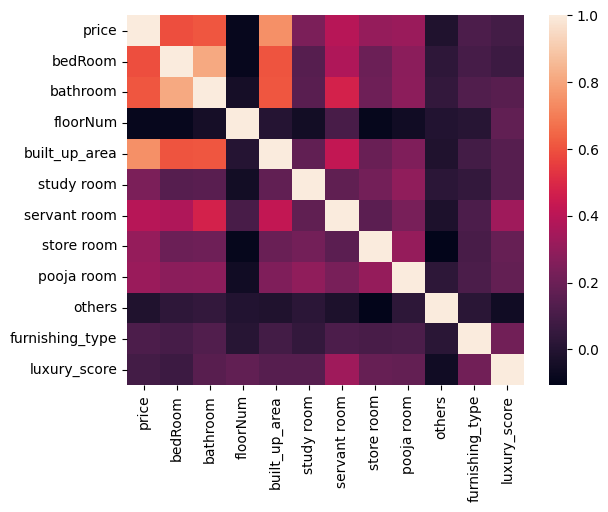

In [8]:
# Convert categorical columns to numerical using one-hot encoding
train_df_encoded = pd.get_dummies(train_df, columns=['property_type', 'sector', 'agePossession'])

# Select only numerical columns for correlation calculation
numerical_columns = train_df_encoded.select_dtypes(include=np.number).columns
train_df_encoded_numeric = train_df_encoded[numerical_columns]

# Calculate correlation matrix on numerical features only
sns.heatmap(train_df_encoded_numeric.corr())

In [9]:
train_df_encoded_numeric.corr()['price'].sort_values(ascending=False)

,price
price,1.000000
built_up_area,0.748574
bathroom,0.609777
bedRoom,0.591289
servant room,0.391930
pooja room,0.319852
store room,0.305677
study room,0.242955
furnishing_type,0.115194
luxury_score,0.091473


### Conclusions from the Correlation Analysis with `price`which are linear relations only:  

1. **Strongest Positive Correlation**:  
   - `built_up_area` (**0.748**): The most influential factor in determining price. Larger properties tend to have higher prices.  
   - `bathroom` (**0.610**) & `bedRoom` (**0.591**): More bedrooms and bathrooms are associated with higher property prices, indicating that larger, more spacious homes are valued higher. But there could be multicolinearity present between bathroom and bedRoom

2. **Moderate Positive Correlation**:  
   - `servant room` (**0.392**), `pooja room` (**0.320**), `store room` (**0.306**), and `study room` (**0.243**) contribute positively to price, suggesting that additional functional spaces add value to a property. But there could be multicolinearity present servant room , study room and pooja room.

3. **Weak Positive Correlation**:  
   - `furnishing_type` (**0.115**): Furnishing plays a minor role in price determination, meaning fully or semi-furnished homes may be slightly more expensive.  
   - `luxury_score` (**0.091**): A small positive impact, indicating that luxury features contribute to price but are not a primary factor. Here we can say There is no linear relation.

4. **Negative Correlation**:  
   - `floorNum` (**-0.087**): A slightly negative correlation suggests that higher floors may not always command higher prices, possibly due to accessibility concerns or preferences for lower floors.  
   - `others` (**-0.013**): This variable has almost no correlation with price, implying it has little to no impact.  


In [10]:
# cols in question

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession

### luxury score

<Axes: ylabel='luxury_score'>

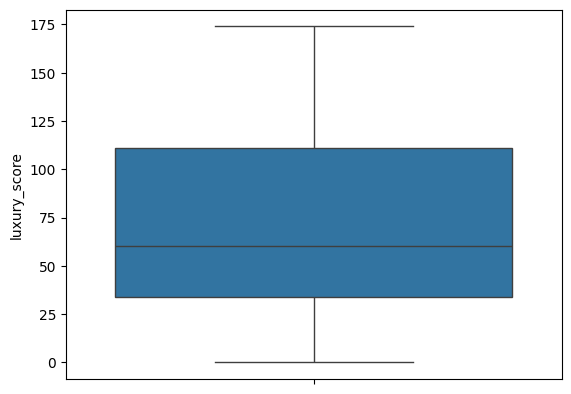

In [11]:
sns.boxplot(df['luxury_score'])

### This feature is created by us and we can not ask its value like howmuch luxury score you want, so we can make it categorical. if score is
- greater than 0 and less than 50 => "Low" or budget
- greater than 50 and less than 150 => "Medium" or semi-luxury
- greater than 150 => "High" or Luxury

In [12]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [13]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [14]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,1,8,Low
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,1,38,Low
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,1,49,Low
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,2,174,High
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,1,159,High


In [15]:
train_df['luxury_category'].value_counts()

,count
luxury_category,
Low,1594
Medium,1465
High,495


### floorNum

<Axes: ylabel='floorNum'>

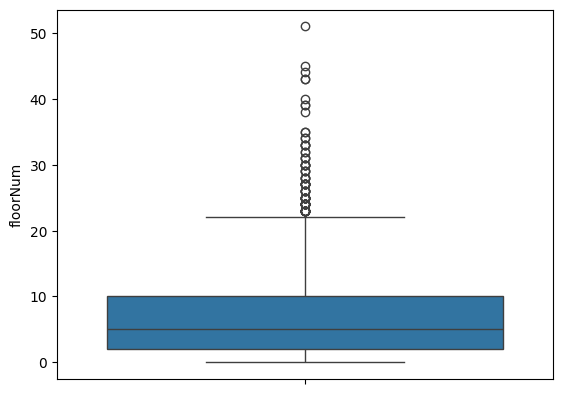

In [16]:
sns.boxplot(df['floorNum'])

Similar to luxury score, we can again convert the floorNum into categorical columns. if floorNum is
- greater than 0 and less than 2 => "Low Floor"
- greater than 2 and less than 11 => "Mid Floor"
- greater than 11  => "High Floor"

In [17]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [18]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [19]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,1,8,Low,Low Floor
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,1,38,Low,Mid Floor
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,1,49,Low,High Floor
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,2,174,High,Mid Floor
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,1,159,High,Mid Floor


In [20]:
train_df['floor_category'].value_counts()

,count
floor_category,
Mid Floor,1797
Low Floor,953
High Floor,804


In [21]:
# Now we can drop the floorNum and luxury_score
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [22]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3,2,2,New Property,850.0,0,0,0,0,0,1,Low,Low Floor
1,flat,sector 89,0.95,2,2,2,New Property,1226.0,1,1,0,0,0,1,Low,Mid Floor
2,flat,sohna road,0.32,2,2,1,New Property,1000.0,0,0,0,0,0,1,Low,High Floor
3,flat,sector 92,1.60,3,4,3+,Relatively New,1615.0,0,1,0,0,1,2,High,Mid Floor
4,flat,sector 102,0.48,2,2,1,Relatively New,582.0,0,0,1,0,0,1,High,Mid Floor


In [23]:
train_df.to_csv('gurgaon_properties_feature_engg_2.csv', index=False)

# Feature Selection

### Since all our feature selection techniques works only on numerical columns, so we have to convert our categorical columns into numerical columns
#### Here, I used OrdinalEncoder, it will convert categories into 0, 1, 2, etc values.
####for example: property_type
- flat  -> 0
- house -> 1

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [ ]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,40.0,3,2,2.0,1.0,850.0,0,0,0,0,0,1,1.0,1.0
1,0.0,101.0,2,2,2.0,1.0,1226.0,1,1,0,0,0,1,1.0,2.0
2,0.0,111.0,2,2,1.0,1.0,1000.0,0,0,0,0,0,1,1.0,0.0
3,0.0,105.0,3,4,4.0,3.0,1615.0,0,1,0,0,1,2,0.0,2.0
4,0.0,4.0,2,2,1.0,3.0,582.0,0,0,1,0,0,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,96.0,2,2,1.0,3.0,532.0,0,0,0,0,0,1,2.0,2.0
3550,1.0,11.0,5,5,4.0,3.0,6228.0,1,1,1,1,0,1,0.0,1.0
3551,0.0,25.0,1,1,1.0,0.0,665.0,0,0,0,0,0,2,2.0,2.0
3552,1.0,50.0,5,6,3.0,0.0,5490.0,1,1,1,1,0,1,2.0,2.0


In [ ]:
y_label

,price
0,0.82
1,0.95
2,0.32
3,1.60
4,0.48
...,...
3549,0.37
3550,6.00
3551,0.60
3552,15.50


# Feature Selection Methodology

## Multi-Technique Feature Importance Aggregation

### Overview
I am using **8 different feature selection techniques** to comprehensively evaluate feature importance. The final selected features will be determined by aggregating scores from all techniques.

### Techniques Used

1. **Correlation Analysis**  
   - Measures linear relationship between features and target
   - Score: Absolute value of Pearson correlation coefficient

2. **Random Forest Feature Importance**  
   - Gini importance from sklearn's RandomForest
   - Score: Mean decrease in impurity

3. **Gradient Boosting Feature Importance**  
   - Importance from sklearn's GradientBoosting
   - Score: Mean decrease in impurity

4. **Permutation Importance**  
   - Measures drop in performance when feature values are shuffled
   - Score: sklearn's permutation_importance

5. **LASSO (L1 Regularization)**  
   - Linear model with L1 penalty
   - Score: Absolute value of coefficients

6. **Recursive Feature Elimination (RFE)**  
   - Recursively removes least important features
   - Score: Ranking (1=best) converted to scores

7. **Linear Regression Weights**  
   - Standard linear regression coefficients
   - Score: Absolute value of coefficients

8. **SHAP Values**  
   - Game-theoretic approach to explain model outputs
   - Score: Mean absolute SHAP values

### Aggregation Methodology

```
# Pseudocode for aggregation
final_scores = {}
for feature in all_features:
    total_score = (corr_score + rf_score + gb_score
                 + perm_score + lasso_score
                 + rfe_score + linreg_score
                 + shap_score)
    final_scores[feature] = total_score
```
# Select top N features based on aggregated scores
selected_features = sorted(final_scores.items(),
                          key=lambda x: x[1],
                          reverse=True)[:top_n]

### Advantages of This Approach
Comprehensive: Combines diverse perspectives on feature importance

Robust: Reduces bias from any single technique

Flexible: Can adjust weights for different techniques if needed

Explainable: Clear scoring methodology

# Technique 1 - Correlation Analysis

```
# This is formatted as code
```



<Axes: >

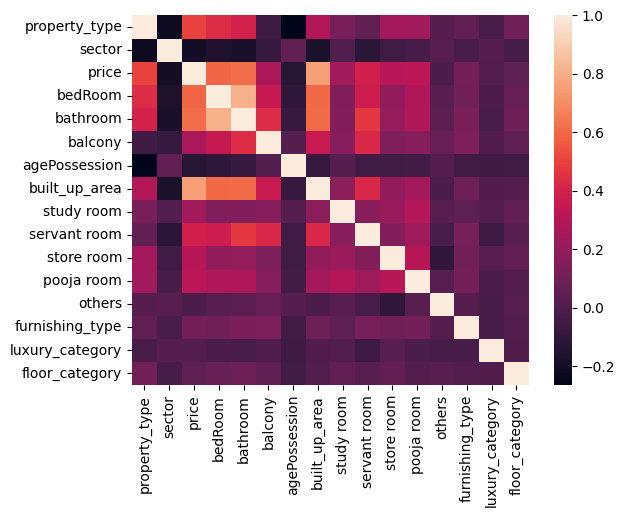

In [ ]:
 sns.heatmap(data_label_encoded.corr())

## **Heatmap of Feature Correlations**

The following heatmap visually represents the **correlation matrix** of the encoded dataset using `sns.heatmap()`. Correlation measures the linear relationship between features, ranging from **-1 to +1**:

### **Key Observations:**
1. **Color Intensity**  
   - **Bright (Yellow/White)**: High positive correlation (values close to **+1**).  
   - **Dark (Black/Purple)**: High negative correlation (values close to **-1**).  
   - **Mid-Tones (Blue/Green)**: Weak or no correlation (values near **0**).  

2. **Diagonal Line**  
   - Always **bright yellow** because a feature perfectly correlates with itself (value = **+1**).  

3. **Linear Relationships**  
   - **Positive Correlation (Bright Squares)**: As one feature increases, the other tends to increase.  
   - **Negative Correlation (Dark Squares)**: As one feature increases, the other tends to decrease.  
   - **Near-Zero (Mid-Color)**: No linear relationship exists.  

4. **Symmetry**  
   - The matrix is mirrored across the diagonal since `corr()` is symmetric (`corr(A,B) = corr(B,A)`).  

### **Why This Matters?**
- **Feature Selection**: Highly correlated features (|r| > 0.8) may introduce redundancy (consider removing one).  
- **Multicollinearity**: Bright off-diagonal squares indicate potential multicollinearity, which can skew model performance.  
- **Insights**: Helps identify influential features for downstream tasks (e.g., regression, clustering).  


### **Simple Explanation of Correlation Heatmap Insights**  

#### **a. Feature Selection: Removing Redundant Features**  
**What it means**:  
If two features (columns) in your data are **very strongly related** (correlation > 0.8 or < -0.8), they might be giving the **same information** to your model. Keeping both can confuse the model without adding value.  

**Example**:  
Imagine you have two features:  
- `Years of Experience`  
- `Salary`  

If they have a correlation of **0.9**, it means:  
- As years of experience increase, salary also increases almost every time.  
- You might only need **one of them** in your model because they tell the same story.  

**Action**:  
- Remove one of them (`Years of Experience` or `Salary`) to simplify your model.  

---

#### **b. Multicollinearity: When Features Are Too Related**  
**What it means**:  
If multiple features are **highly correlated**, some machine learning models (like linear regression) can get **confused** and give unreliable results.  

**Example**:  
Suppose you have:  
- `Number of Rooms in a House`  
- `Size of the House (sq. ft.)`  
- `Price of the House`  

If `Number of Rooms` and `Size of House` have a **0.85 correlation**, the model might struggle to decide which one really affects the `Price`.  

**Problem**:  
- The model might **overweight** these features or give **unstable predictions**.  

**Solution**:  
- Remove one (`Number of Rooms` or `Size of House`) or combine them (e.g., `Rooms per Sq. Ft.`).  

---

#### **c. Insights: Finding Important Features**  
**What it means**:  
The heatmap helps you see which features **strongly affect** your target variable (the thing you’re trying to predict).  

**Example**:  
You’re predicting **House Price**, and the heatmap shows:  
- `Location` → **High correlation (0.7)** with Price  
- `Age of House` → **Low correlation (0.1)** with Price  

**Takeaway**:  
- `Location` is **important** for predicting price.  
- `Age of House` might **not matter much**—you could consider dropping it.  


In [ ]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.201678
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.132989
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


# Technique 2 - Random Forest Feature Importance


### **🔍 What It Does**  
A **Random Forest** is like a team of decision-making experts voting on the best prediction. Each "expert" (decision tree) also tells us which features (columns) were **most useful** in making accurate predictions.  

### **📊 How It Works**  
1. The model trains multiple decision trees on different parts of the data.  
2. Each tree ranks features by how much they **improve prediction accuracy**.  
3. The final "importance" score is the **average rank** across all trees.  

---

### **Example**  
**Predicting Apple Quality**  
Suppose we have:  
- `Sweetness` (Sugar content)  
- `Color` (Redness)  
- `Size` (Weight)  
- `Bruises` (Yes/No)  

After training, the model might say:  
```
Feature Importance:  
1. Sweetness  → 0.45 (Most important!)  
2. Bruises    → 0.30  
3. Color      → 0.20  
4. Size       → 0.05 (Least important)  
```  
**Meaning**:  
- `Sweetness` is the **biggest factor** in apple quality.  
- `Size` hardly matters—we could maybe drop it!  

---

### **💡 Key Notes**  
✅ **Pros**:  
- Works for **any type of data** (numbers, categories).  
- Handles **non-linear** relationships well.  

### **When to Use?**  
- **Feature Selection**: Remove low-importance features to simplify models.  
- **Explainability**: Understand what drives predictions (e.g., "Price is most affected by Location").

⚠️ **Limitations**:  
- Can **overestimate** importance for high-cardinality features (e.g., IDs).  
- If two features are **correlated**, importance may be split between them.  

---
### **Understanding Random Forest Feature Importance Limitations**  

Random Forest feature importance is powerful, but it has **two key pitfalls** you must know to avoid misinterpretation:  

---

## **a. Overestimating Importance of High-Cardinality Features**  
### ❓ **What’s the Problem?**  
- **High-cardinality features** = Features with many unique values (e.g., `User_ID`, `Transaction_ID`).  
- Random Forests can **wrongly** rank them as important, even if they’re meaningless.  

### 🎯 **Why It Happens**  
- A unique ID can **accidentally** split data in a way that seems helpful (pure luck).  
- Since Random Forests try many random splits, noisy features sometimes appear useful.  

### 🍎 **Example: Predicting Fruit Freshness**  
Your dataset has:  
| Fruit_ID | Color  | Sweetness | Fresh (Target) |  
|----------|--------|-----------|----------------|  
| 1        | Red    | 5.2       | Yes            |  
| 2        | Green  | 3.1       | No             |  
| ...      | ...    | ...       | ...            |  
| 1000     | Yellow | 4.8       | Yes            |  

**Problem:**  
- `Fruit_ID` (1 to 1000) has **no real meaning**, but the model might assign it high importance just because it’s unique for each row.  

**Solution:**  
✅ **Remove IDs/high-cardinality features** before training.  
✅ Use **permutation importance** (a more reliable alternative).  

---

## **b. Splitting Importance Between Correlated Features**  
### ❓ **What’s the Problem?**  
- If two features are **strongly related** (e.g., `Height_in_cm` and `Height_in_inches`), the model may **randomly pick one** and ignore the other.  
- This **underestimates** the true importance of both.  

### 🎯 **Why It Happens**  
- Random Forests randomly select features for splits.  
- If `Feature A` and `Feature B` are **almost identical**, the model uses either—**diluting** (0.5 will be split into .25 and .25 score between 2 features) their importance scores.  

### 🏠 **Example: Predicting House Prices**  
Your dataset has:  
| Size_sqft | Size_m² | Bedrooms | Price |  
|-----------|---------|----------|-------|  
| 1500      | 139     | 3        | 300K  |  
| 2000      | 186     | 4        | 400K  |  

**Problem:**  
- `Size_sqft` and `Size_m²` are **perfectly correlated** (one is just a unit conversion of the other).  
- The model might assign:  
  - `Size_sqft` → 0.25 importance  
  - `Size_m²` → 0.25 importance  
  - But **together**, they should have **0.5 importance** (since size truly matters).  

**Solution:**  
✅ **Drop one of the correlated features** before training.  
✅ Use **PCA** (Principal Component Analysis) to merge them into one feature.  

---

## **How to Detect & Fix These Issues?**  
| Problem                     | Detection                                   | Fix                                      |  
|-----------------------------|--------------------------------------------|------------------------------------------|  
| **High-cardinality noise**   | Check for features with too many uniques (e.g., IDs, hashes). | Remove them before training. |  
| **Correlated features**      | Plot a **correlation heatmap** (`sns.heatmap(df.corr())`). | Keep only one from each correlated pair. |  

---




In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.649638
1,sector,0.104153
0,property_type,0.100058
3,bathroom,0.026273
2,bedRoom,0.023994
8,servant room,0.019260
5,agePossession,0.014295
4,balcony,0.012845
7,study room,0.008951
12,furnishing_type,0.008935


# Technique 3 - Gradient Boosting Feature importances

Gradient boosting models (like XGBoost, LightGBM, and CatBoost) provide built-in feature importance measures that are highly effective for feature selection and model interpretation.

## What Are Gradient Boosting Feature Importances?

These importance scores:
- Quantify each feature's contribution to model predictions
- Are calculated during the training process
- Come in several types (weight, gain, cover)
- Help identify the most predictive features in your dataset

## Types of Feature Importance in Gradient Boosting

### 1. Weight (Frequency) Importance
- Counts how many times a feature is used to split data
- Simple count metric
- May favor high-cardinality features

### 2. Gain (Average Contribution) Importance
- Measures average improvement in accuracy when using the feature
- Most commonly used and reliable
- Accounts for magnitude of impact

### 3. Cover Importance
- Measures how many observations are affected by the feature
- Reflects the coverage of each feature
- Less commonly used than gain

## Simple Example in Python (XGBoost)

```python
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Get importance scores
importance_types = ['weight', 'gain', 'cover']
for imp_type in importance_types:
    print(f"\n{imp_type.upper()} Importance:")
    importances = model.get_booster().get_score(importance_type=imp_type)
    for feat, score in sorted(importances.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"{feature_names[int(feat[1:])]}: {score:.4f}")

# Plot gain importance
xgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.show()
```

## When to Use Gradient Boosting Feature Importance

1. **Feature Selection**: Identify the most predictive features
2. **Model Debugging**: Detect problematic or leaky features
3. **Data Understanding**: Learn what drives predictions
4. **Dimensionality Reduction**: Remove unimportant features

## Advantages

1. **Model-Specific**: Tailored to how the model actually uses features
2. **Multiple Perspectives**: Different importance types reveal different insights
3. **Efficient**: Calculated during training at no extra cost
4. **Reliable**: Generally more accurate than filter methods

## Limitations

1. **Model-Dependent**: Only relevant for the specific trained model
2. **Correlation Effects**: May spread importance across correlated features
3. **Scale Sensitivity**: Affected by feature scaling in some implementations
4. **Implementation Variability**: Different libraries may calculate differently

## Practical Tips

1. **Use Gain Importance as Default**:
   ```python
   importance = model.feature_importances_  # Usually gain in scikit-learn API
   ```

2. **Visualize Importance**:
   ```python
   xgb.plot_importance(model, importance_type='gain')
   ```

3. **Combine Importance Types**:
   ```python
   weight_imp = model.get_booster().get_score(importance_type='weight')
   gain_imp = model.get_booster().get_score(importance_type='gain')
   ```

4. **Compare Across Models**:
   ```python
   from sklearn.ensemble import GradientBoostingClassifier
   gb_model = GradientBoostingClassifier().fit(X_train, y_train)
   compare_importances(xgb_model, gb_model)
   ```

## Advanced Techniques

1. **Permutation Importance Comparison**:
   ```python
   from sklearn.inspection import permutation_importance
   perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10)
   ```

2. **SHAP Values Integration**:
   ```python
   import shap
   explainer = shap.TreeExplainer(model)
   shap_values = explainer.shap_values(X_test)
   ```

3. **Feature Selection Wrapper**:
   ```python
   from sklearn.feature_selection import SelectFromModel
   selector = SelectFromModel(model, threshold='median', prefit=True)
   X_selected = selector.transform(X_test)
   ```

4. **Cross-Validated Importance**:
   ```python
   from sklearn.model_selection import cross_val_score
   cv_scores = cross_val_score(model, X_selected, y, cv=5)
   ```

## Implementation Differences Across Libraries

| Library  | Default Importance | Access Method                      | Notes                          |
|----------|--------------------|------------------------------------|--------------------------------|
| XGBoost  | weight             | `get_score()` or `feature_importances_` | Need to specify importance_type |
| LightGBM | split              | `feature_importance()`             | Can get gain importance        |
| CatBoost | prediction value   | `get_feature_importance()`         | Different calculation method   |
| sklearn  | impurity decrease  | `feature_importances_`             | Similar to gain importance     |

Gradient boosting feature importance provides one of the most practical and effective ways to understand feature relevance in your predictive models, especially when using these powerful algorithms. The importance scores can guide feature engineering, model simplification, and data collection strategies.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.686412
1,sector,0.100035
0,property_type,0.096256
2,bedRoom,0.038422
3,bathroom,0.034832
8,servant room,0.022220
9,store room,0.009562
5,agePossession,0.004551
7,study room,0.002945
12,furnishing_type,0.001970


# Technique 4 - Permutation Importance
  

#### **📌 Definition**  
**Permutation Importance** measures how much **scrambling (jumbling)** the values of a feature reduces the model’s accuracy.  

- If scrambling a feature **hurts accuracy a lot** → The feature is **important**.  
- If scrambling a feature **has little/no effect** → The feature is **not useful**.  

---

### **🔢 Step-by-Step Example**  
**Dataset with 3 Features:**  
| f1   | f2 | f3 | Target |  
|------|----|----|--------|  
| 25   | A  | 10 | Yes    |  
| 36   | B  | 20 | No     |  
| 87   | C  | 30 | Yes    |  
| 45   | D  | 40 | No     |  
| 62   | E  | 50 | Yes    |  

**Step 1: Train Model & Check Original Accuracy**  
- Model accuracy **before shuffling**: **0.82** (82% correct predictions).  

**Step 2: Shuffle `f1` & Recheck Accuracy**  
- **Original `f1`**: `[25, 36, 87, 45, 62]`  
- **Shuffled `f1`**: `[62, 87, 25, 45, 36]` *(Randomly reordered)*  
- **New accuracy**: **0.62** (62%)  

**Interpretation**:  
- Accuracy dropped from **0.82 → 0.62** (↓ **0.20**) when `f1` was scrambled.  
- **Conclusion**: `f1` is **very important** to the model!  

---

### **🚀 Compare with Other Features**  
| Feature Shuffled | New Accuracy | Importance (Drop in Accuracy) | Verdict |  
|------------------|-------------|-------------------------------|---------|  
| **f1**           | 0.62        | **0.82 → 0.62** (↓ **0.20**)  | ✅ Critical |  
| **f2**           | 0.80        | **0.82 → 0.80** (↓ **0.02**)  | ❌ Minor |  
| **f3**           | 0.82        | **0.82 → 0.82** (↓ **0.00**)  | 🗑️ Useless |  

**Key Takeaways**:  
1. **`f1` is crucial** (scrambling it ruined predictions).  
2. **`f2` has minor impact** (model barely noticed).  
3. **`f3` is irrelevant** (no effect when shuffled).  

---

### **💡 Why Use Permutation Importance?**  
✅ **More reliable** than Random Forest’s built-in importance (avoids overestimating noisy features).  
✅ **Works for any model** (not just Random Forests).  
✅ **Easy to interpret** (directly measures how much a feature matters).  


---
### **📌 Final Notes**  
- **Use it after training** to debug your model.  
- **Drop features with near-zero importance** to simplify your model.  
- **Always compare with domain knowledge**—if a feature *should* matter but doesn’t, investigate!  


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.738535
0,property_type,0.205604
1,sector,0.180915
2,bedRoom,0.024042
8,servant room,0.021000
3,bathroom,0.019854
5,agePossession,0.006395
10,pooja room,0.001252
9,store room,0.000823
13,luxury_category,0.000679


#### when we jumbled study room columns, the accuracy increases

# **Why Ordinal Encoding Affects Linear Models (But Not Tree Models)**  

#### **🔍 Key Idea:**  
- **Tree-based models** (Random Forest, XGBoost) don’t care how numbers are assigned to categories.  
- **Linear models** (Linear Regression, Logistic Regression) assume numbers have **mathematical meaning** (order, distance).  

---

### **🍎 Simple Example: "Size" Categories**  
Suppose you have a column:  
| Size (Category) | Ordinal Encoding | One-Hot Encoding |  
|-----------------|------------------|------------------|  
| Small           | 1                | [1, 0, 0]        |  
| Medium          | 2                | [0, 1, 0]        |  
| Large           | 3                | [0, 0, 1]        |  

---

### **1. Problem with Ordinal Encoding in Linear Models**  
#### **How Linear Models Interpret Numbers:**  
- They assume:  
  - `Small (1) < Medium (2) < Large (3)` **(Order matters)**  
  - The difference between `Small→Medium (2-1=1)` and `Medium→Large (3-2=1)` is **equal**.  

#### **Why This is Bad:**  
- What if "Large" isn’t **twice as big** as "Medium"?  
- The model might wrongly assume:  
  - `Large = 3 × Small` (nonsense for categories!).  

#### **Result:**  
- **Biased coefficients** → Poor predictions.  

---

### **2. Why Tree Models Don’t Care**  
#### **How Trees Split Data:**  
- They ask: *"Is Size ≤ 2?"* (split at 1.5, 2.5, etc.).  
- **No assumption** about numerical relationships:  
  - `Small (1)`, `Medium (2)`, `Large (3)` are just **labels**.  

#### **Result:**  
- Works fine with ordinal encoding!  

---

### **3. One-Hot Encoding Fixes This for Linear Models**  
#### **What It Does:**  
- Converts categories into **binary columns**:  
  - `Size_Small = [1, 0, 0]`  
  - `Size_Medium = [0, 1, 0]`  
  - `Size_Large = [0, 0, 1]`  

#### **Why It Works:**  
- Each category gets its own **independent coefficient**.  
- No false assumptions about order/distance!  

#### **Example:**  
- Model learns:  
  - `Price = 100 + (20 × Size_Small) + (50 × Size_Medium) + (80 × Size_Large)`  
  - No artificial "slope" between sizes.  

---

### **📊 Comparison Table**  
| **Model Type**       | **Ordinal Encoding** | **One-Hot Encoding** |  
|----------------------|----------------------|----------------------|  
| **Linear Regression** | ❌ Misleading weights | ✅ Correct weights |  
| **Random Forest**    | ✅ Works fine        | ✅ Works (but may increase dimensionality) |  


# Technique 5 - LASSO (Least Absolute Shrinkage and Selection Operator)

LASSO is a powerful regression analysis technique that performs both variable selection and regularization to enhance prediction accuracy and interpretability of statistical models.

## What is LASSO?

LASSO (Least Absolute Shrinkage and Selection Operator) is:
- A regression method that adds a penalty equal to the absolute value of the magnitude of coefficients
- Particularly useful when dealing with high-dimensional data (many predictors)
- Capable of shrinking some coefficients to exactly zero, effectively performing variable selection

## How LASSO Works

### Mathematical Formulation

The LASSO estimate is defined by:

```
minimize (RSS + λ * Σ|βj|)
```

Where:
- RSS = Residual Sum of Squares (measure of model fit)
- λ = Tuning parameter controlling the strength of penalty
- βj = Regression coefficients
- Σ|βj| = L1 penalty term (sum of absolute values of coefficients)

### Key Characteristics

1. **Shrinkage**: Shrinks coefficient estimates towards zero
2. **Variable Selection**: Can produce coefficient estimates of exactly zero
3. **Regularization**: Helps prevent overfitting



## When to Use LASSO

1. **Feature Selection**: When you have many features and want to identify the most important ones
2. **Multicollinearity**: When predictors are highly correlated
3. **Preventing Overfitting**: In high-dimensional datasets where p > n (more features than observations)

## Advantages of LASSO

- Performs both feature selection and regularization
- Produces sparse models (easier to interpret)
- Works well with high-dimensional data
- Computationally efficient compared to some other methods

## Disadvantages of LASSO

- Tends to select only one variable from a group of correlated variables
- Requires careful tuning of the λ (alpha) parameter
- May underperform when true model has many small non-zero coefficients

## Practical Tips

1. **Standardize Features**: LASSO is sensitive to feature scales, so standardize before fitting
2. **Cross-Validate Alpha**: Use cross-validation to find the optimal regularization strength
3. **Examine Coefficients**: Look at which features were selected (non-zero coefficients)
4. **Combine with EDA**: Use LASSO results to guide further exploratory analysis

## Comparison with Ridge Regression

| Feature        | LASSO                     | Ridge                     |
|----------------|---------------------------|---------------------------|
| Penalty Type   | L1 (absolute values)      | L2 (squared values)       |
| Coefficients   | Can be exactly zero       | Shrunk but rarely zero    |
| Best For       | Feature selection         | Handling multicollinearity|
| Computation    | May need specialized solvers | Standard matrix operations |

LASSO is particularly valuable in machine learning pipelines where interpretability and feature selection are important considerations alongside prediction accuracy.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.509007
0,property_type,0.710749
3,bathroom,0.289766
9,store room,0.207003
8,servant room,0.181862
7,study room,0.179335
10,pooja room,0.085526
13,luxury_category,0.043486
12,furnishing_type,0.043111
2,bedRoom,0.020449


#### According to this, sector is not reliable which is not good, it is because we have to avoid using label encoder and used one hot encoding

# Technique 6 - *RFE (Recursive Feature Elimination)

RFE (Recursive Feature Elimination) is a powerful feature selection technique that works by recursively removing the least important features and building a model with the remaining ones.

## What is RFE?

RFE is:
- A wrapper-style feature selection algorithm
- A backward elimination technique that starts with all features
- Capable of ranking features by importance
- Particularly useful when you need to identify the optimal subset of features

## How RFE Works

### The RFE Algorithm

1. **Train a model** on all features initially
2. **Rank features** by their importance (coefficients, feature_importances_, etc.)
3. **Remove the least important feature(s)**
4. **Repeat the process** with the remaining features
5. **Continue** until reaching the desired number of features

### Key Characteristics

1. **Recursive Nature**: Features are eliminated one by one recursively
2. **Model-Based**: Uses a machine learning model to evaluate feature importance
3. **Ranking Output**: Provides a ranking of features from most to least important
4. **Flexible**: Can be used with any model that provides feature importance scores


## When to Use RFE

1. **High-Dimensional Data**: When you have many features (p > n problems)
2. **Model Interpretability**: When you need simpler, more interpretable models
3. **Computational Efficiency**: When reducing features can speed up model training
4. **Improved Performance**: When removing irrelevant features might improve accuracy

## Advantages of RFE

- Systematically identifies the most important features
- Can improve model performance by removing noisy features
- Reduces overfitting by eliminating irrelevant variables
- Provides a clear ranking of feature importance
- Works with any model that provides feature importance

## Disadvantages of RFE

- Computationally expensive for large datasets
- Feature importance depends on the underlying model
- May eliminate features that are useful in combination
- Requires careful selection of the final feature count

## Practical Tips

1. **Choose the Right Model**: Select an appropriate estimator for your problem type
2. **Cross-Validation**: Use RFECV (RFE with cross-validation) for automatic feature selection
3. **Feature Scaling**: Standardize features before RFE if using distance-based models
4. **Iterative Testing**: Experiment with different n_features_to_select values
5. **Combine with EDA**: Use RFE results to guide further exploratory analysis

## Comparison with Other Feature Selection Methods

| Method        | Type         | Pros                          | Cons                         |
|---------------|--------------|-------------------------------|------------------------------|
| RFE           | Wrapper      | Model-specific, accurate      | Computationally expensive    |
| Filter Methods| Independent  | Fast, model-agnostic          | May miss feature interactions|
| Embedded      | Model-based  | Efficient, built into models  | Limited to specific models   |



In [ ]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.644784
1,sector,0.105202
0,property_type,0.102726
2,bedRoom,0.028194
3,bathroom,0.024007
8,servant room,0.020510
5,agePossession,0.015708
4,balcony,0.012121
12,furnishing_type,0.009601
7,study room,0.008323


# Technique 7 - Linear Regression Weights for Feature Importance

Linear regression weights (coefficients) provide a straightforward way to assess feature importance in your models. These weights represent the relationship between each feature and the target variable while holding other features constant.

## What Are Linear Regression Weights?

The weights in linear regression:
- Represent the estimated coefficients (β) in the equation: ŷ = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ
- Show how much the target variable changes with a one-unit change in the predictor
- Can indicate both the direction (sign) and magnitude of each feature's influence

## How to Interpret Weights

### Positive Weights
- Indicate a positive relationship with the target
- Example: A weight of 0.75 for "square footage" in a home price model means each additional square foot adds $750 to the price (if target is in $1000s)

### Negative Weights
- Indicate a negative relationship with the target
- Example: A weight of -1.2 for "distance to city center" means homes lose $1,200 in value per mile further from downtown

### Magnitude Matters
- Larger absolute values indicate stronger influence
- Weights are only comparable when features are standardized



## When to Use Regression Weights for Feature Importance

1. **Interpretable Models**: When you need to explain feature contributions
2. **Preliminary Analysis**: For initial feature screening
3. **Low-Dimensional Data**: When you have relatively few features
4. **Linear Relationships**: When you expect linear feature-target relationships

## Advantages

- Direct interpretation of feature impact
- Computationally efficient
- No additional calculations needed beyond model fitting
- Works well with standardized features

## Limitations

- Only captures linear relationships
- Can be misleading with correlated features
- Sensitive to feature scale (requires standardization)
- Doesn't account for feature interactions unless explicitly modeled

## Practical Tips

1. **Standardize Features**: Always standardize before comparing weights
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

2. **Visualize Weights**: Create bar plots of coefficients
```python
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Weight'])
plt.title('Feature Weights in Linear Regression')
plt.xlabel('Coefficient Value')
plt.show()
```

3. **Check Confidence Intervals**: Use statsmodels for statistical inference

```
import statsmodels.api as sm

X_with_const = sm.add_constant(X_scaled)
model = sm.OLS(y, X_with_const).fit()
print(model.summary())  # Shows p-values and confidence intervals
```

4. **Combine with Other Methods**: Use weights alongside:
   - Correlation analysis
   - Domain knowledge
   - Other feature importance techniques



In [ ]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.511434
0,property_type,0.708988
3,bathroom,0.297104
9,store room,0.211505
8,servant room,0.191600
7,study room,0.188152
10,pooja room,0.088862
13,luxury_category,0.054121
12,furnishing_type,0.052594
2,bedRoom,0.023636


# Technique 8 - SHAP (SHapley Additive exPlanations)

SHAP is a game-theoretic approach to explain the output of any machine learning model by quantifying the contribution of each feature to individual predictions.

## What is SHAP?

SHAP (SHapley Additive exPlanations) is:
- A unified framework for interpreting model predictions
- Based on Shapley values from cooperative game theory
- Provides both global and local feature importance
- Model-agnostic (works with any ML model)

## How SHAP Works

### Core Concepts

1. **Shapley Values**:
   - Fairly distribute the "payout" (prediction) among features
   - Calculate the average marginal contribution of a feature across all possible coalitions

2. **Additive Feature Attribution**:
   - Explanation model: g(z') = φ₀ + Σφⱼzⱼ'
   - Where φⱼ is the Shapley value for feature j
   - zⱼ' ∈ {0,1} indicates if feature is present

3. **Local Accuracy**:
   - Explanation matches model output for specific input: f(x) = g(x')

## Simple Example in Python

```python
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Visualize first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], feature_names=feature_names)

# Summary plot (global importance)
shap.summary_plot(shap_values[1], X, feature_names=feature_names)
```

## Key SHAP Visualizations

1. **Force Plot**:
   - Shows how features push prediction from base value
   ```python
   shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], feature_names)
   ```

2. **Summary Plot**:
   - Global feature importance and impact direction
   ```python
   shap.summary_plot(shap_values[1], X, feature_names)
   ```

3. **Dependence Plot**:
   - Shows effect of single feature across dataset
   ```python
   shap.dependence_plot("worst radius", shap_values[1], X, feature_names)
   ```

4. **Decision Plot**:
   - Shows how features contribute to final prediction
   ```python
   shap.decision_plot(explainer.expected_value[1], shap_values[1][:10], feature_names)
   ```

## When to Use SHAP

1. **Model Interpretability**: When you need to explain complex models
2. **Feature Importance**: For both global and local explanations
3. **Debugging Models**: Identify problematic features
4. **Regulatory Compliance**: When you need auditable explanations

## Advantages of SHAP

1. **Theoretically Sound**: Based on solid game theory
2. **Consistent Explanations**: Features always contribute fairly
3. **Local Accuracy**: Perfectly explains individual predictions
4. **Global Interpretability**: Aggregates to show overall patterns
5. **Model Agnostic**: Works with any machine learning model

## Practical Implementation Tips

1. **For Tree-based Models**:
   ```python
   explainer = shap.TreeExplainer(model)
   shap_values = explainer.shap_values(X)
   ```

2. **For Neural Networks**:
   ```python
   explainer = shap.DeepExplainer(model, background_data)
   shap_values = explainer.shap_values(input_data)
   ```

3. **For Any Model (Kernel SHAP)**:
   ```python
   explainer = shap.KernelExplainer(model.predict, background_data)
   shap_values = explainer.shap_values(input_data)
   ```

4. **Sampling for Large Datasets**:
   ```python
   shap_values = explainer.shap_values(X[:100])  # Use subset
   ```

## Advanced SHAP Techniques

1. **Interaction Values**:
   ```python
   shap_interaction = explainer.shap_interaction_values(X)
   ```

2. **Custom Plots**:
   ```python
   shap.plots.waterfall(shap_values[0])
   ```

3. **Model Comparison**:
   ```python
   shap_values_model2 = explainer2.shap_values(X)
   shap.summary_plot([shap_values[1], shap_values_model2[1]], X, feature_names)
   ```

4. **Time Series Analysis**:
   ```python
   shap.time_series_plot(feature_index, shap_values, X)
   ```

## Comparison with Other Interpretation Methods

| Method       | Local | Global | Model-Specific | Theoretical Foundation |
|--------------|-------|--------|----------------|------------------------|
| SHAP         | ✓     | ✓      | Some variants  | Game Theory            |
| LIME         | ✓     | ✗      | ✗              | Local Approximation    |
| Feature Attr | ✓     | ✓      | ✓              | Varies                 |
| Permutation  | ✗     | ✓      | ✗              | Feature Importance     |

SHAP provides one of the most comprehensive approaches to model interpretability, offering both mathematically rigorous feature attribution and intuitive visualizations that help stakeholders understand complex model behavior.

In [ ]:
!pip install shap

In [ ]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-0.18272692,  0.11312805, -0.03052615, ..., -0.01022885,
        -0.00439081, -0.00931829],
       [-0.19936867, -0.39893124, -0.05160273, ..., -0.00970635,
        -0.00297124, -0.00389001],
       [-0.17375985, -0.42903645, -0.04844296, ..., -0.01123799,
        -0.01199589, -0.02031988],
       ...,
       [-0.18154032,  0.06818695, -0.01571882, ...,  0.00984162,
         0.01415612, -0.00294485],
       [ 1.4716346 ,  0.98718317,  0.38411668, ...,  0.05540229,
         0.04338599,  0.03324094],
       [-0.31894463,  0.01912032, -0.02284779, ...,  0.00222011,
        -0.01012111,  0.03521703]])

In [ ]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.251544
0,property_type,0.472899
1,sector,0.384645
3,bathroom,0.111310
8,servant room,0.095327
2,bedRoom,0.051913
4,balcony,0.041794
5,agePossession,0.026642
12,furnishing_type,0.024569
14,floor_category,0.024451


In [ ]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [ ]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.201678,0.104153,0.100035,0.180915,-0.048251,0.105202,-0.056913,0.384645
bedRoom,0.591289,0.023994,0.038422,0.024042,0.020449,0.028194,0.023636,0.051913
bathroom,0.609777,0.026273,0.034832,0.019854,0.289766,0.024007,0.297104,0.111310
balcony,0.269637,0.012845,0.001850,0.000181,-0.035582,0.012121,-0.058596,0.041794
agePossession,-0.132989,0.014295,0.004551,0.006395,-0.000000,0.015708,-0.003192,0.026642
built_up_area,0.748574,0.649638,0.686412,0.738535,1.509007,0.644784,1.511434,1.251544
study room,0.242955,0.008951,0.002945,-0.020326,0.179335,0.008323,0.188152,0.019793
servant room,0.391930,0.019260,0.022220,0.021000,0.181862,0.020510,0.191600,0.095327
store room,0.305677,0.008577,0.009562,0.000823,0.207003,0.006865,0.211505,0.017270


In [ ]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [ ]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,40.0,3,2,2.0,1.0,850.0,0,0,0,0,0,1,1.0,1.0
1,0.0,101.0,2,2,2.0,1.0,1226.0,1,1,0,0,0,1,1.0,2.0
2,0.0,111.0,2,2,1.0,1.0,1000.0,0,0,0,0,0,1,1.0,0.0
3,0.0,105.0,3,4,4.0,3.0,1615.0,0,1,0,0,1,2,0.0,2.0
4,0.0,4.0,2,2,1.0,3.0,582.0,0,0,1,0,0,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,96.0,2,2,1.0,3.0,532.0,0,0,0,0,0,1,2.0,2.0
3550,1.0,11.0,5,5,4.0,3.0,6228.0,1,1,1,1,0,1,0.0,1.0
3551,0.0,25.0,1,1,1.0,0.0,665.0,0,0,0,0,0,2,2.0,2.0
3552,1.0,50.0,5,6,3.0,0.0,5490.0,1,1,1,1,0,1,2.0,2.0


### Since, **pooja room**, **study room**, **others** these 3 columns are the bottom columns for all techniques, So we can remove that. but before removing it we have to prove that it will not affect the performance much

In [ ]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()

np.float64(0.8197192518845938)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()

np.float64(0.8179276798485514)

### Since, both score's mean are same, so we can remove these columns

In [ ]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [ ]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [ ]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,40.0,3,2,2.0,1.0,850.0,0,0,1,1.0,1.0,0.82
1,0.0,101.0,2,2,2.0,1.0,1226.0,1,0,1,1.0,2.0,0.95
2,0.0,111.0,2,2,1.0,1.0,1000.0,0,0,1,1.0,0.0,0.32
3,0.0,105.0,3,4,4.0,3.0,1615.0,1,0,2,0.0,2.0,1.60
4,0.0,4.0,2,2,1.0,3.0,582.0,0,1,1,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,96.0,2,2,1.0,3.0,532.0,0,0,1,2.0,2.0,0.37
3550,1.0,11.0,5,5,4.0,3.0,6228.0,1,1,1,0.0,1.0,6.00
3551,0.0,25.0,1,1,1.0,0.0,665.0,0,0,2,2.0,2.0,0.60
3552,1.0,50.0,5,6,3.0,0.0,5490.0,1,1,1,2.0,2.0,15.50
